<a href="https://colab.research.google.com/github/gabrielmprata/acidentes_transito/blob/main/Acidentes_Rodoviarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img loading="lazy" src="https://cdn.jsdelivr.net/gh/devicons/devicon@latest/icons/python/python-original.svg" width="40" height="40"/> <img src="https://cdn.jsdelivr.net/gh/devicons/devicon@latest/icons/pandas/pandas-original-wordmark.svg" width="40" height="40"/>   <img loading="lazy" src="https://cdn.jsdelivr.net/gh/devicons/devicon@latest/icons/plotly/plotly-original-wordmark.svg" width="40" height="40"/>

---
**Pré Processamento de dados**
>
**Dev**: Gabriel Prata
>
**Data**: 06/03/2025
>
**Última modificação**: 06/03/2025
>
**Contexto**: *Dados abertos de acidentes de trânsito*
>
---

#**<font color=#4c60d6 size="6"> Import libraries**

In [8]:
# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings
import datetime
import re # expressão regulares

#bibliotecas para visualização de dados
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

#**<font color=#4c60d6 size="6"> 1. Objetivo**

Esse Notebook, foca na etapa de pré-processamento de dados.
>
Esta é a etapa mais demorada e trabalhosa do projeto de ciência de dados, e estima-se que consuma pelo menos 70% do tempo total do projeto.
>
Ao final desse notebook, entregaremos um arquivo mais coeso para as análises dos dados de acidentes de trânsito, nas rodovias federais brasileiras.

#**<font color=#4c60d6 size="6"> 2. Coleta de dados**

Os dados foram coletados do sítio da Polícia Rodoviária Federal.
<img align="left" width="80" height="94" src="https://github.com/gabrielmprata/MVP_Sprint01_Puc_Rio/assets/119508139/f9646e84-d274-406b-9a7a-12add19acb07">
>
https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes
>

###**<font color=#4c60d6> 2.1 Acidentes por ocorrência**

In [9]:
# importando dataset

# URL de importação
url   = "https://raw.githubusercontent.com/gabrielmprata/acidentes_transito/main/datasets/datatran2024.zip"

url2   = "https://raw.githubusercontent.com/gabrielmprata/acidentes_transito/main/datasets/datatran2023.zip"

df_acidentes = pd.read_csv(url, compression='zip', encoding = "Latin 1", delimiter=';')

# 2023 somente para comparativo
df_acidentes_2023 = pd.read_csv(url2, compression='zip', encoding = "Latin 1", delimiter=';')


###**<font color=#4c60d6> 2.2 Região IBGE**

Iremos utilizar a API do IBGE, para coletar informações, que irão enriquecer o Dataset com o nome estado e a região.

In [29]:
pip install ibge

In [30]:
# Importando os pacotes da biblioteca de localidades
from ibge.localidades import *

In [40]:
# Função Estados() retorna um objeto do tipo ibge.localidades.Estados
dados = Estados()
#dados = Municipios()

In [41]:
type(dados)

ibge.localidades.Estados

In [42]:
regiao = dados.json()

In [43]:
#pandas json_normalize ler a string JSON aninhada e devolver um DataFrame.
estados_br = pd.json_normalize(regiao)

In [44]:
estados_br.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27 non-null     int64 
 1   sigla         27 non-null     object
 2   nome          27 non-null     object
 3   regiao.id     27 non-null     int64 
 4   regiao.sigla  27 non-null     object
 5   regiao.nome   27 non-null     object
dtypes: int64(2), object(4)
memory usage: 1.4+ KB


In [46]:
# Criar um data frame com as colunas que iremos utilizar
tb_regiao = estados_br[['sigla',
                            'nome',
                            'regiao.nome'
                          ]]

In [49]:
#renomear colunas
tb_regiao = tb_regiao.rename(columns={'sigla': 'uf',
                                      'nome': 'uf_nome',
                                'regiao.nome': 'regiao'
                                })

#**<font color=#4c60d6 size="6"> 3. Análise de Dados Inicial**

###**<font color=#4c60d6> 3.1. Estatísticas Descritivas**

In [10]:
#	Quantidade de atributos e instâncias (linhas/colunas)
df_acidentes.shape

(73156, 30)



---



In [11]:
# Exibir os 5 primeiros registros
df_acidentes.head(5)

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,571789.0,2024-01-01,segunda-feira,03:56:00,ES,101,38,CONCEICAO DA BARRA,Ultrapassagem Indevida,Colisão lateral sentido oposto,...,1,1,1,1,3,-18.482610,-39.923790,SPRF-ES,DEL04-ES,UOP02-DEL04-ES
1,571804.0,2024-01-01,segunda-feira,04:50:00,PI,343,185,PIRIPIRI,Manobra de mudança de faixa,Colisão frontal,...,0,1,0,0,2,-4.296033,-41.767327,SPRF-PI,DEL02-PI,UOP01-DEL02-PI
2,571806.0,2024-01-01,segunda-feira,04:30:00,BA,116,578,BREJOES,Ingestão de álcool pelo condutor,Colisão frontal,...,0,1,2,0,4,-13.071583,-39.961111,SPRF-BA,DEL03-BA,UOP02-DEL03-BA
3,571818.0,2024-01-01,segunda-feira,06:30:00,SE,101,18,MALHADA DOS BOIS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,1,0,2,1,3,-10.356019,-36.905522,SPRF-SE,DEL02-SE,UOP02-DEL02-SE
4,571838.0,2024-01-01,segunda-feira,05:00:00,MT,364,240,RONDONOPOLIS,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,2,1,0,3,-16.179141,-54.789053,SPRF-MT,DEL02-MT,UOP01-DEL02-MT




---



In [7]:
# Mostra diversas informações do Dataframe em um único comando, e exibir o uso de memória
df_acidentes.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73156 entries, 0 to 73155
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      73156 non-null  float64
 1   data_inversa            73156 non-null  object 
 2   dia_semana              73156 non-null  object 
 3   horario                 73156 non-null  object 
 4   uf                      73156 non-null  object 
 5   br                      73156 non-null  int64  
 6   km                      73156 non-null  object 
 7   municipio               73156 non-null  object 
 8   causa_acidente          73156 non-null  object 
 9   tipo_acidente           73156 non-null  object 
 10  classificacao_acidente  73155 non-null  object 
 11  fase_dia                73156 non-null  object 
 12  sentido_via             73156 non-null  object 
 13  condicao_metereologica  73156 non-null  object 
 14  tipo_pista              73156 non-null



---



In [9]:
# Quantidade de valores únicos
df_acidentes.nunique()

,0
id,73156
data_inversa,366
dia_semana,7
horario,1415
uf,27
br,113
km,7683
municipio,1833
causa_acidente,69
tipo_acidente,17




---



In [10]:
# Quantidade de NaN/Missing/Nulls no dataframe
df_acidentes.isnull().sum()

,0
id,0
data_inversa,0
dia_semana,0
horario,0
uf,0
br,0
km,0
municipio,0
causa_acidente,0
tipo_acidente,0


In [15]:
# Quantidade de NaN/Missing/Nulls no dataframe
df_acidentes_2023.isnull().sum()

,0
id,0
data_inversa,0
dia_semana,0
horario,0
uf,0
br,0
km,0
municipio,0
causa_acidente,0
tipo_acidente,0




---



###**<font color=#4c60d6> 3.2. Distribuição dos atributos**

>Nessa etapa, iremos verificar a distribuição dos principais atributos. Para ver se existe a necessidade de tomar alguma ação de transformações na etapa de preparação de dados.


---

In [11]:
df_acidentes.describe().round(2)

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude
count,73156.00,73156.00,73156.00,73156.00,73156.00,73156.00,73156.00,73156.00,73156.00,73156.00,73156.00,73156.00
mean,613003.77,209.58,2.60,0.08,0.88,0.28,1.05,0.40,1.16,1.99,-18.81,-46.40
std,23344.41,128.82,2.23,0.37,1.13,0.64,1.75,0.82,1.25,1.08,7.72,6.21
min,571772.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,-33.68,-72.64
25%,593042.75,101.00,2.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,-25.10,-50.21
50%,613246.50,158.00,2.00,0.00,1.00,0.00,1.00,0.00,1.00,2.00,-20.41,-47.01
75%,633190.25,324.00,3.00,0.00,1.00,0.00,1.00,1.00,1.00,2.00,-12.59,-42.18
max,661607.00,495.00,93.00,37.00,83.00,35.00,78.00,33.00,84.00,26.00,4.45,-32.41


In [12]:
df_acidentes.dia_semana.value_counts() #quantidade

,count
dia_semana,
domingo,11741
sábado,11641
sexta-feira,11300
segunda-feira,10208
quinta-feira,9570
quarta-feira,9384
terça-feira,9312


In [13]:
df_acidentes.causa_acidente.value_counts() #quantidade

,count
causa_acidente,
Reação tardia ou ineficiente do condutor,10920
Ausência de reação do condutor,10664
Acessar a via sem observar a presença dos outros veículos,6958
Condutor deixou de manter distância do veículo da frente,4460
Velocidade Incompatível,4347
...,...
Restrição de visibilidade em curvas verticais,7
Faróis desregulados,5
Sistema de drenagem ineficiente,4


In [14]:
df_acidentes.tipo_acidente.value_counts() #quantidade

,count
tipo_acidente,
Colisão traseira,13960
Saída de leito carroçável,10827
Colisão transversal,9385
Colisão lateral mesmo sentido,7902
Tombamento,6442
Colisão com objeto,5118
Colisão frontal,4862
Queda de ocupante de veículo,3349
Atropelamento de Pedestre,3167


In [16]:
df_acidentes.classificacao_acidente.value_counts() #quantidade

,count
classificacao_acidente,
Com Vítimas Feridas,56154
Sem Vítimas,11779
Com Vítimas Fatais,5222


In [17]:
df_acidentes.condicao_metereologica.value_counts() #quantidade

,count
condicao_metereologica,
Céu Claro,46271
Nublado,11033
Chuva,7420
Sol,3959
Garoa/Chuvisco,2776
Ignorado,918
Nevoeiro/Neblina,657
Vento,119
Granizo,2


#**<font color=#4c60d6 size="6"> 4. Pré-Processamento de dados**

Após coletar e analisar os dados na etapa anterior, agora é o momento
de limpar, transformar e apresentar melhor os dados.
>
Assim poderemos obter, na próxima etapa, os melhores resultados possíveis nos algoritmos de
Machine Learning, ou simplesmente apresentar dados mais confiáveis para os clientes em soluções de
business intelligence.


---

####**<font color=#4c60d6> 4.1 Duplicidade de registros**

O arquivo contempla um sinistro por registro, tendo como chave o campo: **id**

In [24]:
df_acidentes.duplicated(subset='id', keep='first').sum()

0

In [25]:
df_acidentes_2023.duplicated(subset='id', keep='first').sum()

0

Sem duplicidades

####**<font color=#4c60d6> 4.2 Redundâncias**

Vamos eliminar as colunas que não iremos utilizar em nossas analises.
>
A ideia é ter um dataframe mais leve, e com pouco espaço em disco.

In [12]:
df_acidentes.drop([
              'regional','delegacia', 'uop'
             ], axis=1, inplace= True)

In [13]:
df_acidentes_2023.drop([
              'regional','delegacia', 'uop'
             ], axis=1, inplace= True)

####**<font color=#4c60d6> 4.3 Tratamento de Missings**

<Axes: >

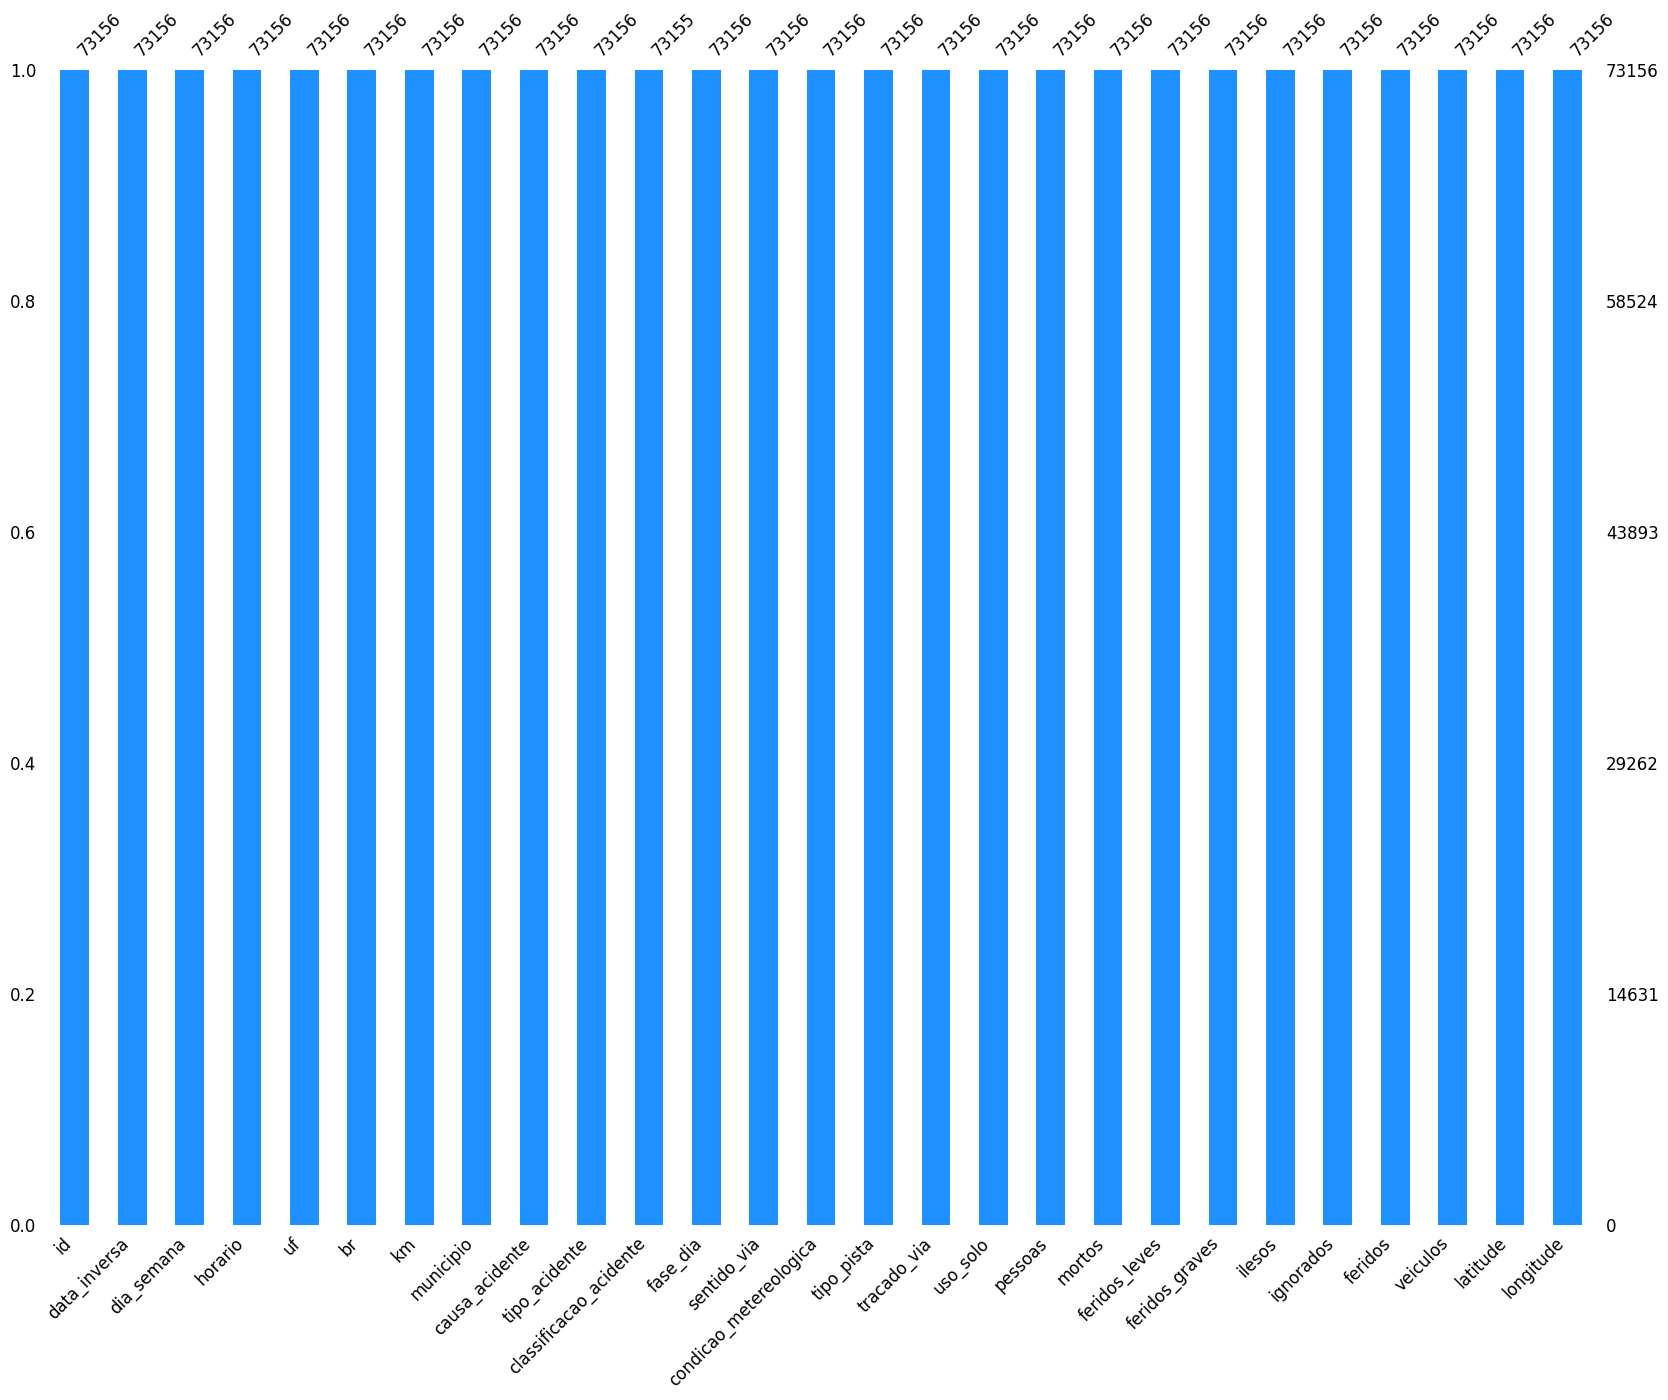

In [19]:
ms.bar(df_acidentes, color="dodgerblue",  figsize=(20,15), fontsize=12)

<Axes: >

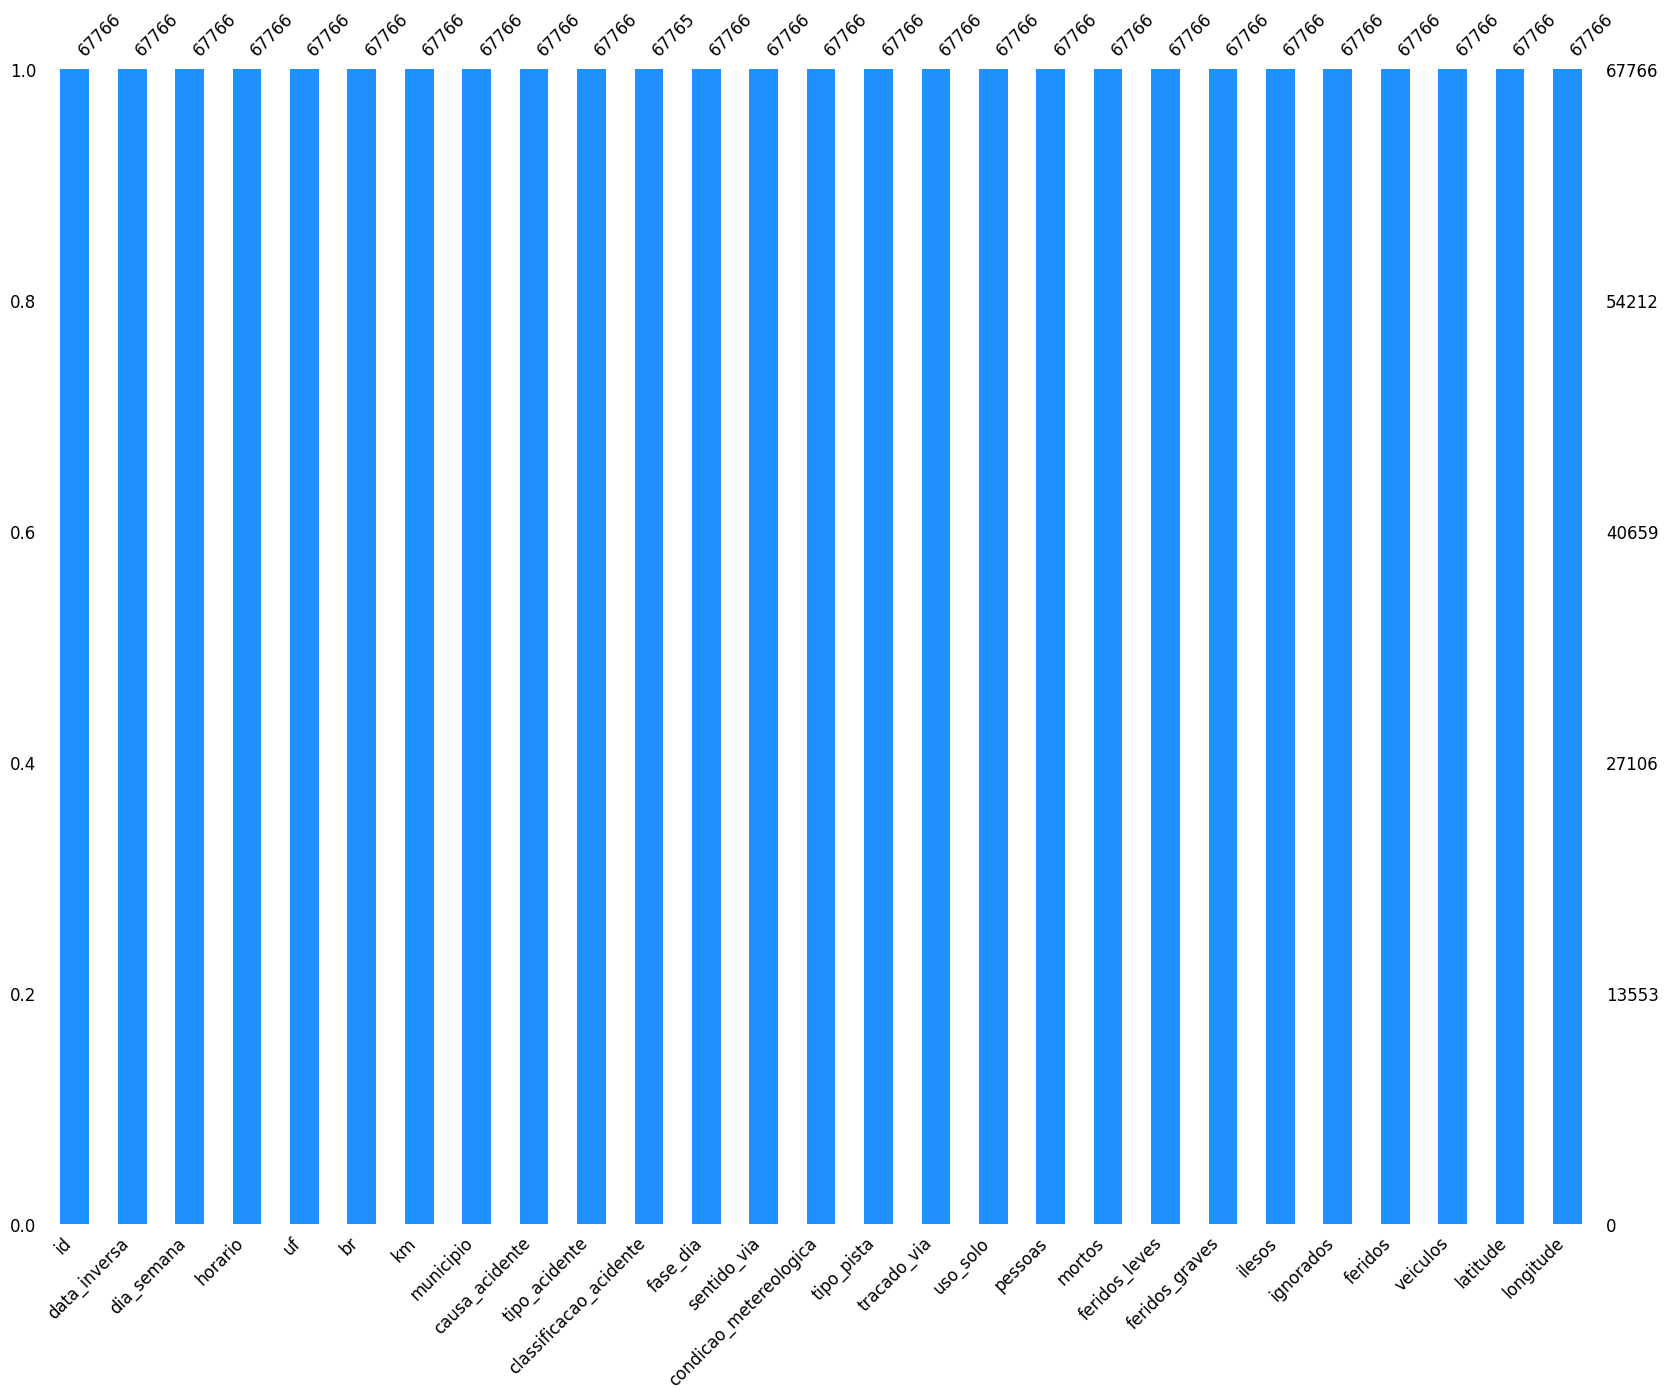

In [14]:
ms.bar(df_acidentes_2023, color="dodgerblue",  figsize=(20,15), fontsize=12)

O dataframe com as informações de 2024, não possui registros nulos.
>
Já o de 2023, possui 1 registro nulo no campo **classificacao_acidente**

In [16]:
# excluir registro NULL
df_acidentes_2023 = df_acidentes_2023.dropna()

###**<font color=#4c60d6> 4.4 Criação de recursos**

Também conhecida como ***feature engineering***, a criação de recursos consiste em criar, a partir dos atributos originais, um conjunto de atributos que capture informações importantes.

> <font color=#4c60d6>**Concatenar informações**

In [18]:
df_acidentes = pd.concat([df_acidentes, df_acidentes_2023],sort=False, ignore_index=True)

> <font color=#4c60d6>**Campo data e hora**

In [19]:
# Dados 2024 e 2023
df_acidentes['data_hora'] = df_acidentes['data_inversa'].map(str) + ' ' + df_acidentes['horario']
df_acidentes['data_hora'] = pd.to_datetime(df_acidentes['data_hora'])
df_acidentes['ano'] = df_acidentes['data_hora'].dt.year
df_acidentes['mes'] = df_acidentes['data_hora'].dt.month
df_acidentes['hora'] = df_acidentes['data_hora'].dt.hour
df_acidentes['ano_mes'] = df_acidentes['data_hora'].dt.strftime('%Y-%m')
df_acidentes['semana'] = df_acidentes['data_hora'].dt.weekday
#o método weekday() devolve o dia da semana como um número inteiro onde a segunda-feira é indexada como 0 e o domingo como 6


In [20]:
#quantidade de acidentes por ano
por_ano = df_acidentes[['ano', 'id']]
plt_por_ano = por_ano.groupby(["ano"]).count().reset_index()
plt_por_ano

,ano,id
0,2023,67765
1,2024,73156


> <font color=#4c60d6>**Atributo sinistro**

O dataframe registra 1 acidente (sinistro) por tupla, sendo assim, criaremos o atributo **sinistro**.

In [26]:
df_acidentes["sinistro"] = 1

In [28]:
df_acidentes.groupby(["ano"])['sinistro'].sum().reset_index()

,ano,sinistro
0,2023,67765
1,2024,73156


> <font color=#4c60d6>**Atributo Região**

In [52]:
# Left Join entre a Fato e a dimensão
df_acidentes = pd.merge(df_acidentes, tb_regiao, left_on=['uf'], right_on=['uf'], how='left')